In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier

In [2]:
def plot_decision_region(X, y, classifier, test_idx = None, resolution = 0.02, title = ""):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.mestgrid(np.arange(x1_min, x1_max, resolution),
                        np.arenge(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha = .5, cmap = cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    X_test, y_test = X[test_idx, :], y[test_idx]
    

In [3]:
big5_sc = pd.read_csv('./big5_scored.csv')

In [4]:
big5_sc

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,3,2,3,2,3,2,2,4,2,...,3,4,2,3,3,25,39,36,32,30
19716,2,1,4,1,5,1,1,4,1,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,2,2,3,2,2,1,3,4,1,...,5,5,3,5,5,21,20,38,43,42


In [5]:
E = big5_sc.loc[:, "E1":"E10"]

In [6]:
E.loc[:,"score"] = big5_sc.loc[:,"E_SC"]

C:\Users\ajou\AppData\Local\Temp\ipykernel_17368\3466361353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E.loc[:,"score"] = big5_sc.loc[:,"E_SC"]


In [7]:
E

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score
0,4,4,5,4,5,5,4,3,5,5,44
1,2,4,3,3,3,3,1,1,1,1,22
2,5,5,1,2,5,5,1,1,5,5,35
3,2,1,2,2,3,2,3,2,4,1,22
4,3,5,3,3,3,5,3,5,3,1,34
...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,21
19715,2,3,2,3,2,3,2,2,4,2,25
19716,2,1,4,1,5,1,1,4,1,1,21
19717,1,2,2,3,2,2,1,3,4,1,21


In [9]:
categorys = []
for val in E['score']:
    if val < 30:
        category = 0
    else:
        category = 1
    categorys.append(category)
    
E['C'] = categorys

C:\Users\ajou\AppData\Local\Temp\ipykernel_17368\388496684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E['C'] = categorys


In [10]:
E

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score,C
0,4,4,5,4,5,5,4,3,5,5,44,1
1,2,4,3,3,3,3,1,1,1,1,22,0
2,5,5,1,2,5,5,1,1,5,5,35,1
3,2,1,2,2,3,2,3,2,4,1,22,0
4,3,5,3,3,3,5,3,5,3,1,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,21,0
19715,2,3,2,3,2,3,2,2,4,2,25,0
19716,2,1,4,1,5,1,1,4,1,1,21,0
19717,1,2,2,3,2,2,1,3,4,1,21,0


In [11]:
C_train_X, C_train_y = E.iloc[:int(len(E.index)*0.8), :-2], E.iloc[:int(len(E.index)*0.8), -1]
C_test_X, C_test_y = E.iloc[int(len(E.index)*0.8):, :-2], E.iloc[int(len(E.index)*0.8):, -1]

In [12]:
C_classifier = RandomForestClassifier(n_estimators = 10)
C_classifier.fit(C_train_X, C_train_y)

C_score = C_classifier.score(C_test_X, C_test_y)
print(C_score)

0.9665314401622718


In [13]:
C_y_pred = C_classifier.predict(C_test_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(C_test_y), (C_test_y != C_y_pred).sum()))
print('정확도 : %.2f' %((len(C_test_y) - (C_test_y != C_y_pred).sum()) / len(C_test_y)))

총 테스트 개수 : 3944, 오류개수 : 132
정확도 : 0.97


feature ranking:
1. feature E7 (0.193)
2. feature E10 (0.131)
3. feature E1 (0.113)
4. feature E5 (0.106)
5. feature E2 (0.104)
6. feature E4 (0.096)
7. feature E3 (0.077)
8. feature E9 (0.068)
9. feature E6 (0.060)
10. feature E8 (0.051)


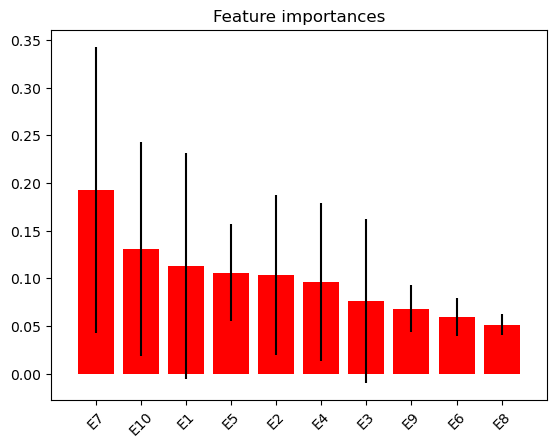

In [22]:
importances = C_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in C_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(len(C_train_X.columns)):
    print("{}. feature {} ({:.3f})".format(f+1, C_train_X.columns[indices][f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(C_train_X.columns)), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(len(C_train_X.columns)), C_train_X.columns[indices], rotation = 45)
plt.xlim([-1, len(C_train_X.columns)])
plt.show()

In [43]:
random.seed(0)

In [44]:
E7_trans_C_train_X = C_train_X.copy()
random.shuffle(E7_trans_C_train_X.loc[:,"E7"])

E7_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E7_trans_C_classifier.fit(E7_trans_C_train_X, C_train_y)

E7_trans_C_score =E7_trans_C_classifier.score(C_test_X, C_test_y)
print(E7_trans_C_score)

0.9533468559837728


In [45]:
E10_trans_C_train_X = C_train_X.copy()
random.shuffle(E10_trans_C_train_X.loc[:,"E10"])

E10_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E10_trans_C_classifier.fit(E10_trans_C_train_X, C_train_y)

E10_trans_C_score =E10_trans_C_classifier.score(C_test_X, C_test_y)
print(E10_trans_C_score)

0.952079107505071


In [46]:
E1_trans_C_train_X = C_train_X.copy()
random.shuffle(E1_trans_C_train_X.loc[:,"E1"])

E1_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E1_trans_C_classifier.fit(E1_trans_C_train_X, C_train_y)

E1_trans_C_score =E1_trans_C_classifier.score(C_test_X, C_test_y)
print(E1_trans_C_score)

0.9530933062880325


In [47]:
E5_trans_C_train_X = C_train_X.copy()
random.shuffle(E5_trans_C_train_X.loc[:,"E5"])

E5_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E5_trans_C_classifier.fit(E5_trans_C_train_X, C_train_y)

E5_trans_C_score =E5_trans_C_classifier.score(C_test_X, C_test_y)
print(E5_trans_C_score)

0.954868154158215


In [48]:
E2_trans_C_train_X = C_train_X.copy()
random.shuffle(E2_trans_C_train_X.loc[:,"E2"])

E2_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E2_trans_C_classifier.fit(E2_trans_C_train_X, C_train_y)

E2_trans_C_score =E2_trans_C_classifier.score(C_test_X, C_test_y)
print(E2_trans_C_score)

0.9558823529411765


In [49]:
E4_trans_C_train_X = C_train_X.copy()
random.shuffle(E2_trans_C_train_X.loc[:,"E4"])

E4_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E4_trans_C_classifier.fit(E4_trans_C_train_X, C_train_y)

E4_trans_C_score =E4_trans_C_classifier.score(C_test_X, C_test_y)
print(E4_trans_C_score)

0.9665314401622718


In [50]:
E3_trans_C_train_X = C_train_X.copy()
random.shuffle(E3_trans_C_train_X.loc[:,"E3"])

E3_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E3_trans_C_classifier.fit(E3_trans_C_train_X, C_train_y)

E3_trans_C_score =E3_trans_C_classifier.score(C_test_X, C_test_y)
print(E3_trans_C_score)

0.9622210953346856


In [51]:
E9_trans_C_train_X = C_train_X.copy()
random.shuffle(E9_trans_C_train_X.loc[:,"E9"])

E9_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E9_trans_C_classifier.fit(E9_trans_C_train_X, C_train_y)

E9_trans_C_score =E9_trans_C_classifier.score(C_test_X, C_test_y)
print(E9_trans_C_score)

0.9513184584178499


In [52]:
E6_trans_C_train_X = C_train_X.copy()
random.shuffle(E6_trans_C_train_X.loc[:,"E6"])

E6_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E6_trans_C_classifier.fit(E6_trans_C_train_X, C_train_y)

E6_trans_C_score =E6_trans_C_classifier.score(C_test_X, C_test_y)
print(E6_trans_C_score)

0.9525862068965517


In [53]:
E8_trans_C_train_X = C_train_X.copy()
random.shuffle(E8_trans_C_train_X.loc[:,"E8"])

E8_trans_C_classifier = RandomForestClassifier(n_estimators = 10)
E8_trans_C_classifier.fit(E8_trans_C_train_X, C_train_y)

E8_trans_C_score =E8_trans_C_classifier.score(C_test_X, C_test_y)
print(E8_trans_C_score)

0.9563894523326572


In [55]:
print(C_score)
print(E7_trans_C_score)
print(E10_trans_C_score)
print(E1_trans_C_score)
print(E5_trans_C_score)
print(E2_trans_C_score)
print(E4_trans_C_score)
print(E3_trans_C_score)
print(E9_trans_C_score)
print(E6_trans_C_score)
print(E8_trans_C_score)

0.9665314401622718
0.9533468559837728
0.952079107505071
0.9530933062880325
0.954868154158215
0.9558823529411765
0.9665314401622718
0.9622210953346856
0.9513184584178499
0.9525862068965517
0.9563894523326572
